In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageDraw
import cv2
import tkinter as tk
from tkinter import Canvas, Button


2023-10-25 18:12:44.250630: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 18:12:44.646203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 18:12:44.649785: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 18:12:46.356513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [4]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/10
422/422 [==============================] - 35s 80ms/step - loss: 0.3692 - accuracy: 0.8881 - val_loss: 0.0839 - val_accuracy: 0.9785
Epoch 2/10
422/422 [==============================] - 33s 78ms/step - loss: 0.1158 - accuracy: 0.9640 - val_loss: 0.0632 - val_accuracy: 0.9830
Epoch 3/10
422/422 [==============================] - 33s 79ms/step - loss: 0.0864 - accuracy: 0.9745 - val_loss: 0.0480 - val_accuracy: 0.9863
Epoch 4/10
422/422 [==============================] - 35s 82ms/step - loss: 0.0719 - accuracy: 0.9782 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 5/10
422/422 [==============================] - 34s 81ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0384 - val_accuracy: 0.9902
Epoch 6/10
422/422 [==============================] - 33s 79ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0345 - val_accuracy: 0.9905
Epoch 7/10
422/422 [==============================] - 33s 78ms/step - loss: 0.0513 - accuracy: 0.9845 - val_loss: 0.0334 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.030370816588401794
Test accuracy: 0.9890000224113464


Width: 28
Height: 28
Изображение черно-белое.
1/1 [==============================] - 0s 46ms/step
Predicted digit: 8


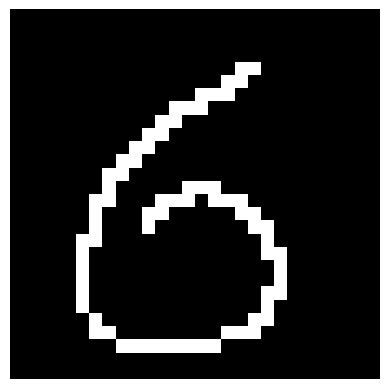

In [14]:
import tkinter as tk
from tkinter import Canvas, Button
from PIL import Image, ImageDraw
import io

# Создаем окно
root = tk.Tk()
root.title("Рисование и сохранение изображения")

# Создаем холст для рисования
scale = 10
canvas_width = 28 * scale
canvas_height = 28 * scale
canvas = Canvas(root, width=canvas_width, height=canvas_height, bg="white")
canvas.pack()

# Создаем изображение и холст для рисования
img = Image.new("L", (28, 28), 255)  # 255 - белый цвет
draw = ImageDraw.Draw(img)

# Переменные для отслеживания движения мыши
prev_x, prev_y = None, None

# Функция для рисования
def paint(event):
    global prev_x, prev_y
    x, y = event.x // scale, event.y // scale

    if prev_x and prev_y:
        draw.line((prev_x, prev_y, x, y), fill=0, width=1)
        canvas.create_line(prev_x * scale, prev_y * scale, x * scale, y * scale, fill="black", width=2)

    prev_x, prev_y = x, y

# Функция для сброса переменных при отпускании кнопки мыши
def release(event):
    global prev_x, prev_y
    prev_x, prev_y = None, None

# Привязываем события
canvas.bind("<B1-Motion>", paint)
canvas.bind("<ButtonRelease-1>", release)

# Функция для обработки нажатия кнопки "OK"
def save_image():
    # Масштабируем изображение до 28x28
    img_data = img.resize((28, 28))
    # img_data = img_data.rotate(-90)  # Повернуть изображение
    img_data.save("/home/misha/Изображения/temp.png")
    root.destroy()

# Создаем кнопку "OK"
ok_button = Button(root, text="OK", command=save_image)
ok_button.pack()

# Запускаем приложение Tkinter
root.mainloop()

# Загрузите ваше изображение и измените его размер до 28x28 пикселей
image = Image.open('/home/misha/Изображения/temp.png')  # Замените "your_image.jpg" на путь к вашему изображению
image = image.resize((28, 28))
# Получим размер изображения
width, height = image.size

# Выведем размер изображения
print("Width:", width)
print("Height:", height)

# Загрузите изображение
image = cv2.imread('/home/misha/Изображения/temp.png', cv2.IMREAD_UNCHANGED)

# Проверьте количество каналов
num_channels = image.shape[2] if len(image.shape) == 3 else 1

if num_channels == 1:
    print("Изображение черно-белое.")
else:
    print("Изображение цветное.")

# Загрузите ваше изображение
image = Image.open("/home/misha/Изображения/temp.png")

# Преобразуйте изображение в формат NumPy и выполните масштабирование
your_image = np.array(image)  # Преобразование в NumPy-массив
your_image = your_image.astype("float32") / 255  # Масштабирование пикселей в диапазон [0, 1]

# Убедитесь, что изображение имеет размерность (28, 28, 1)
# your_image = your_image.reshape((28, 28, 1))
your_image = np.expand_dims(your_image, axis=-1)

plt.imshow(image, cmap='binary')
plt.axis('off')

# Выполните инференс
predictions = model.predict(np.array([your_image]))

# Результат predictions будет вероятностным распределением по классам.
# Для получения конкретного числа (предсказанной цифры) можно воспользоваться:
predicted_digit = np.argmax(predictions)

print("Predicted digit:", predicted_digit)